In [3]:
from LIPA2.ilaplace import *
from LIPA2.qp_solver import *

from utils import *
from utils.interpolate_1D import *


import numpy as np
norm=np.linalg.norm

syms_def(locals(),' c0, c1 ,c0,c1,c2,c3,c4,b1, b2, b3, b4, g, a1, a2, a3, a4, g1')

tic();

import dill
dill.settings['recurse'] = True

fname='ilapi0.ipynb.picle'
if 0:
    #[p,d,q]=sym_reduce([g],[( [b1,b2,b3,b4] ,g  )]);
    [p,d,q]=sym_reduce([c0,c1,c2,c3],[( [b1,b2,b3,b4] ,g  )]);
    dill.dump([p,d,q],open(fname,'wb'))
else:
    [p,d,q]=dill.load(open(fname,'rb'))
    
#[p,d,q]=sym_reduce([c0 ,c1,c0,c1,c2,c3],[( [0,b1,b2,b3] ,g  )]);

toc('reduce:')
#jo=arg2jso(c1=1.1,c2=2.3,c3=1.11,c4=21,c0=10j,g=3.11,g1=2j,b1=2.1,b2=1.2,b3=1.1j,a4=2)
jo={
    
    c0:-5.5+250j,
    c1:-5.5-250.5j,
    c2:-1.5+253j,
    c3:-1.5-253j,
    c4:-21,
    
    g:-17.5+250j,
    #g:0,                
    b1:0,
    b2:-1j,
    b3:0,
    b4:1,
    }



tic();
nd=0

[GF,exg]=ilaplace_functor(p,jo,nd)
[F,exf]=ilaplace_functor(q,jo)



toc('functors:')



reduce: 0.0505295 sec
functors: 0.368206 sec


0.3682057000005443

''

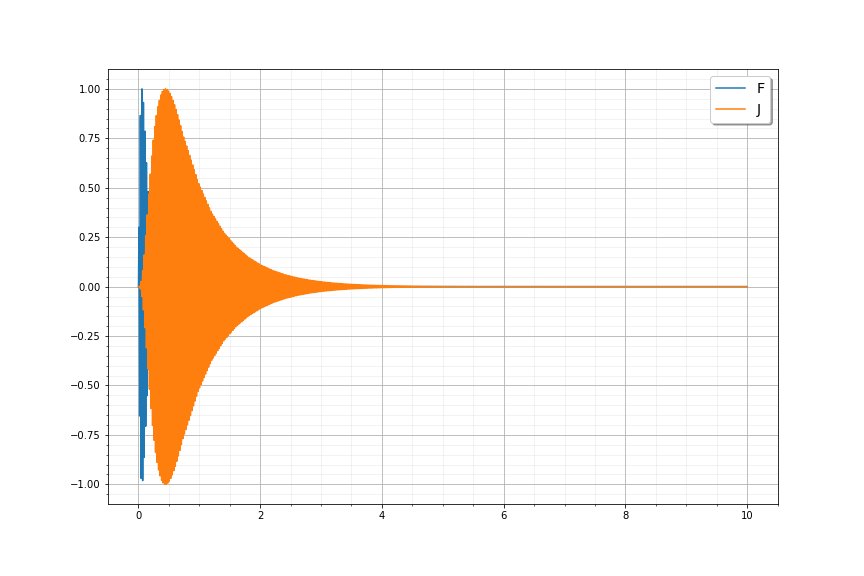

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib widget
#fig=plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
#fig.suptitle('sensors data + pure response ', fontsize=16)
ax.grid(True,which='major')
ax.minorticks_on()
ax.grid(True,which='minor',alpha=0.2)
tt=np.linspace(0,10,7200)
rn=lambda x: x.real/np.max(np.abs(x.real))
#plt.plot(tt,rn(F(tt)),tt,rn(GF(tt)))
ax.plot(tt,rn(F(tt)),label='F')
ax.plot(tt,rn(GF(tt)),label='J');
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
''


(1, 4)
(1,)
(1, 1)


Text(0.5, 1.0, 'error=0.009597%\n')

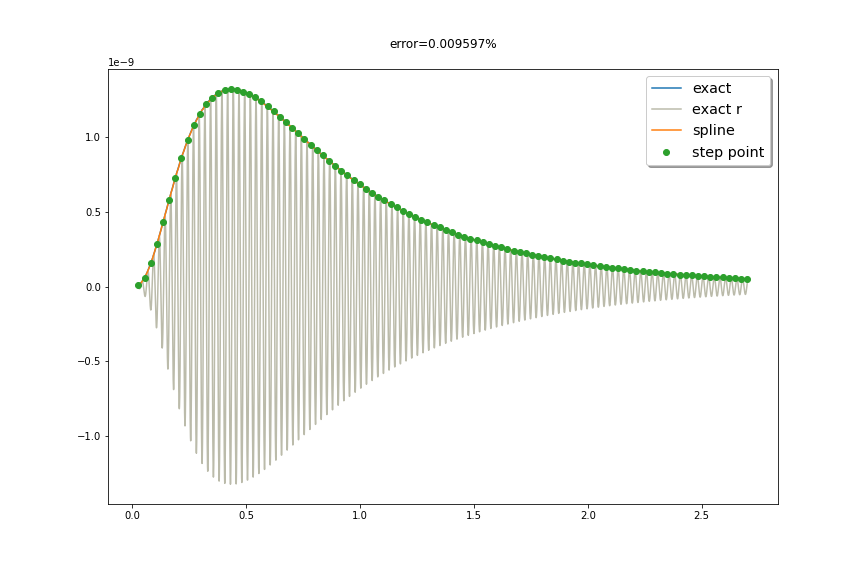

In [19]:
[DC,QP,G,FF]=make_lipa_data(d,q,jo);

LM=[6,8]
LM=[10,12]
LM=[10,14]
dt=0.0225*1.8
dt=0.0225*1.2

'''
LM=[4,4]

dt=0.0000225*1.8
'''

print(QP.shape)
print(G.shape)
print(FF.shape)
lqp=lipa_qp_number(DC,LM=LM,FF=FF,qp=QP,g=G,nd=6).reset(dt);

nt=100
tt=dt*np.arange(1,nt+1)
tm=np.max(tt)
ttx=np.linspace(tt[0],tm,10000)

x=GF(tt)
ynn=lqp.dump(nt)
ynn=ynn.reshape(ynn.shape[0],-1).T
y=ynn[nd]
deg=ynn.shape[0]-1
jG=jet_spline(tt,ynn,deg=deg)

err=norm(x-y)/norm(x);
#fig2=plt.figure(figsize=(12,8))
fig2, ax2 = plt.subplots(figsize=(12,8))
rn = lambda x : np.abs(x)
if 1:
    ax2.plot(ttx,rn(GF(ttx)),label='exact')
    ax2.plot(ttx,GF(ttx).real,label='exact r',color='#bbbbaa')
    ax2.plot(ttx,rn(jG(ttx)),label='spline')
    ax2.plot(tt,rn(y), marker='o',linewidth=0,label='step point')
else:
    ax2.plot(tt,y.real, marker='o',linewidth=0,label='step point')
legend = ax2.legend(loc='upper right', shadow=True, fontsize='x-large')
#print(x)    
#print(y[0])    
s=sprintf('error=%3.4g%%\n',100*err)

ax2.set_title(s)

In [54]:
ynn.shape

(6, 100)

In [ ]:
plt.plot(tt,y, marker='o',linewidth=0)

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(tt,y.real, marker='o',linewidth=0,label='ss')
#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')


In [45]:
nd

0

In [16]:
exf

(t**3/6 - 1.0*I*t)*exp(t*(-17.5 + 250.0*I))

In [17]:
q

(([b1, b2, b3, b4], g),)

In [18]:
GF

<function LIPA2.ilaplace.ilaplace_functor.<locals>.fua(x)>

In [19]:
type(q)

tuple

In [20]:
p

(([b1/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)) + b2/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)**2) + b3/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)**3) + b4/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)**4)],
  c0),
 ([b1/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)) + b2/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)**2) + b3/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)**3) + b4/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)**4)],
  c1),
 ([b1/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)) + b2/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)**2) + b3/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)**3) + b4/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)**4)],
  c2),
 ([b1/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)) + b2/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)**2) + b3/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)**3) + b4/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)**4)],
  c3),
 ([(b1 + b2/(c3 - g) + b2/(c2 - g) + b2/(c1 - g) + b2/(c0 - g) + b3/(c3 - g)**2 + b3/((c2 - g)*(c3 - g)) + b3/(c2 - g)**2 + b3/((c1 - g)*(c3 - g)) + b3/((c1 - g)*(c

In [21]:
q

(([b1, b2, b3, b4], g),)

In [23]:
p

(([b1/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)) + b2/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)**2) + b3/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)**3) + b4/((c0 - c1)*(c0 - c2)*(c0 - c3)*(c0 - g)**4)],
  c0),
 ([b1/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)) + b2/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)**2) + b3/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)**3) + b4/((-c0 + c1)*(c1 - c2)*(c1 - c3)*(c1 - g)**4)],
  c1),
 ([b1/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)) + b2/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)**2) + b3/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)**3) + b4/((-c0 + c2)*(-c1 + c2)*(c2 - c3)*(c2 - g)**4)],
  c2),
 ([b1/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)) + b2/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)**2) + b3/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)**3) + b4/((-c0 + c3)*(-c1 + c3)*(-c2 + c3)*(c3 - g)**4)],
  c3),
 ([(b1 + b2/(c3 - g) + b2/(c2 - g) + b2/(c1 - g) + b2/(c0 - g) + b3/(c3 - g)**2 + b3/((c2 - g)*(c3 - g)) + b3/(c2 - g)**2 + b3/((c1 - g)*(c3 - g)) + b3/((c1 - g)*(c